<a href="https://colab.research.google.com/github/akshaya-ravi19/EasyVisa---Ensemble-Techniques/blob/main/DSBA_Project_ET_EasyVisa_Fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EasyVisa.csv')

In [ ]:
data = df.copy()

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


There are 9 categorial type and 3 numerical type (2 integer type and 1 float type) values present in the Dataset.

In [ ]:
data.shape
print('There are',df.shape[0],'rows and',df.shape[1],'columns in the Dataset.')

There are 25480 rows and 12 columns in the Dataset.


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:
1. There are about 25480 total number of employees in the employer's company.
2. The average prevailing wage paid to the employed workers are about 74455.81. The wages paid range from 319210 (highest paid amount) to 2.13 (least paid amount).

In [ ]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no missing values in the Dataset.

In [ ]:
data.duplicated().sum()

0

There are no duplicate values in the Dataset.

In [ ]:
data.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

As there are 25480 unique case ids for each employee, the column can be dropped as the values of each case id does not add any value to the model built.  

In [ ]:
cat_col = list(data.select_dtypes("object").columns)

for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

In [ ]:
data["case_id"].nunique()

25480

In [ ]:
data.drop(["case_id"], axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

**UNIVARIATE ANALYSIS**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

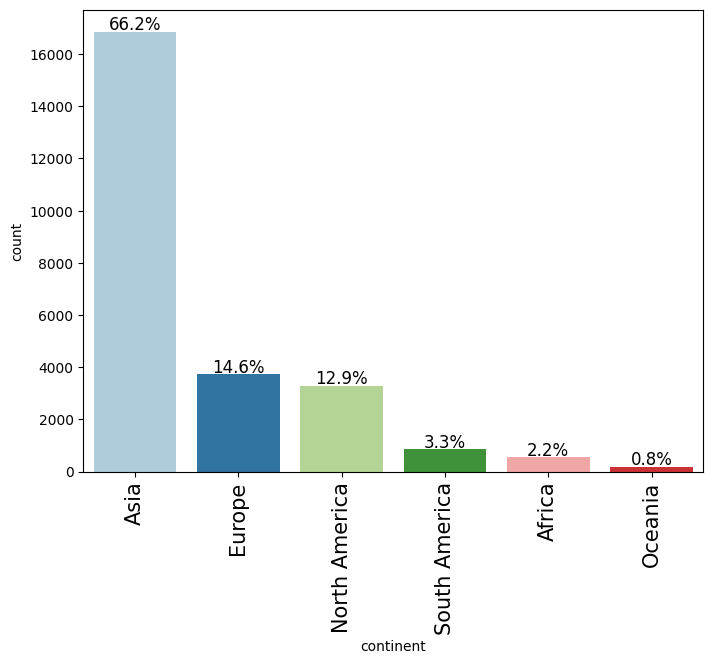

In [ ]:
labeled_barplot(data, "continent", perc=True)

About 66.2% of the total employees are from Asia and only 0.8% belong to Oceania continent.

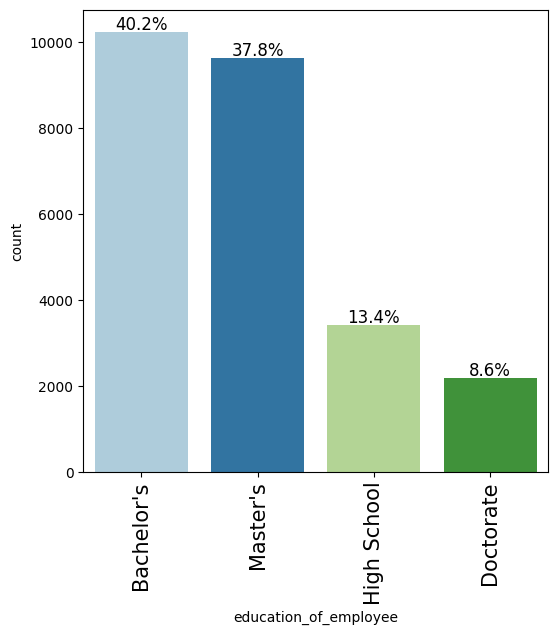

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True)

40.2% of the employees hold Bachelor's Degree, 13.4% of them are high school passouts and only 8.6% of the employee workers hold a Doctorate degree.

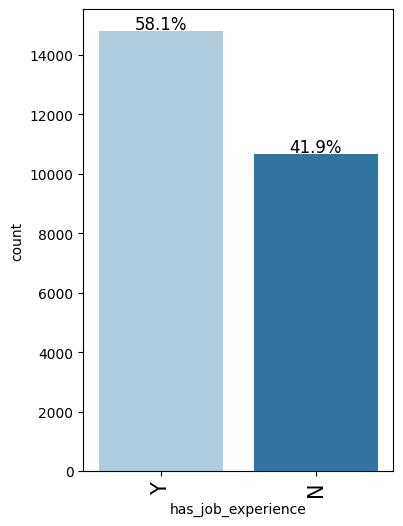

In [ ]:
labeled_barplot(data, "has_job_experience", perc=True)

58.1% of the employees have some sort of a job experience.

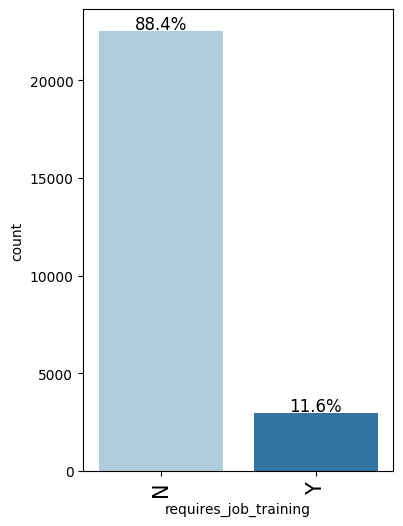

In [ ]:
labeled_barplot(data, "requires_job_training", perc=True)

88.4% of the employees require job training.

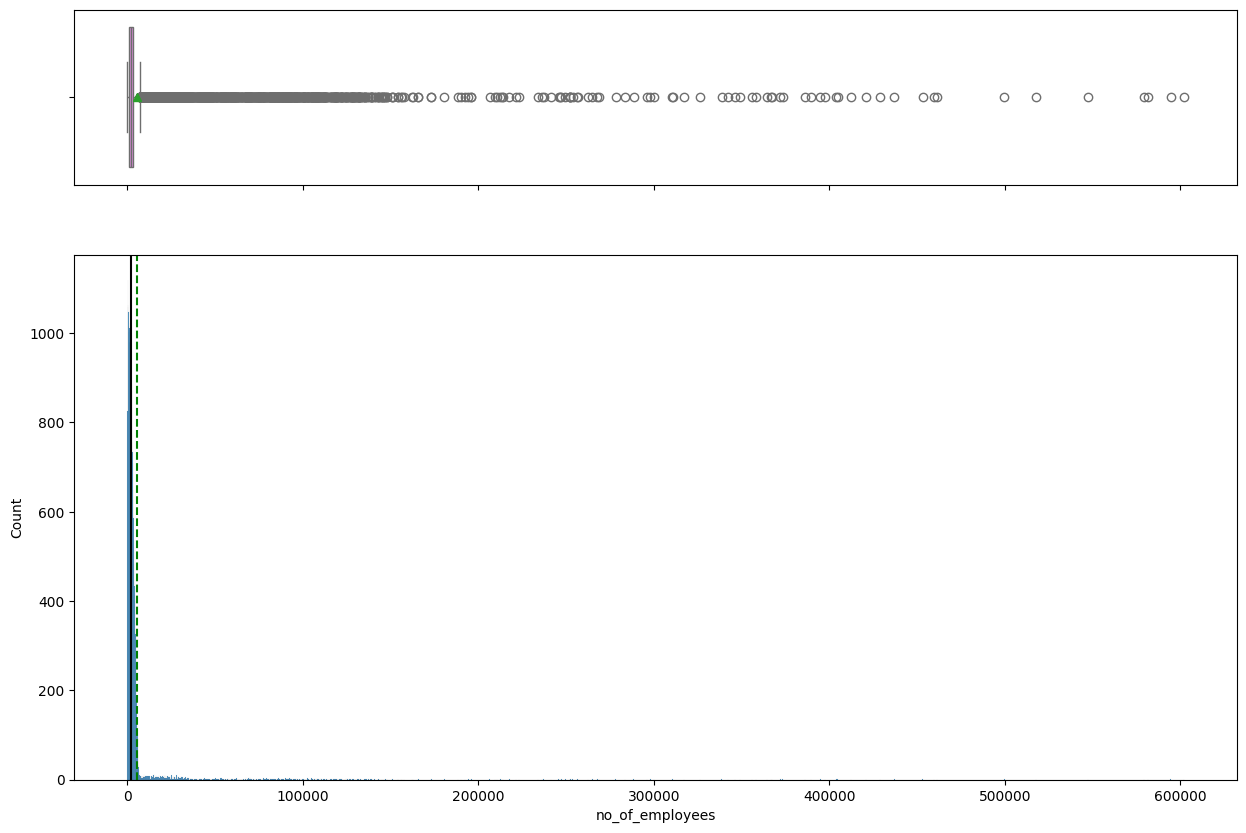

In [ ]:
histogram_boxplot(data,'no_of_employees')

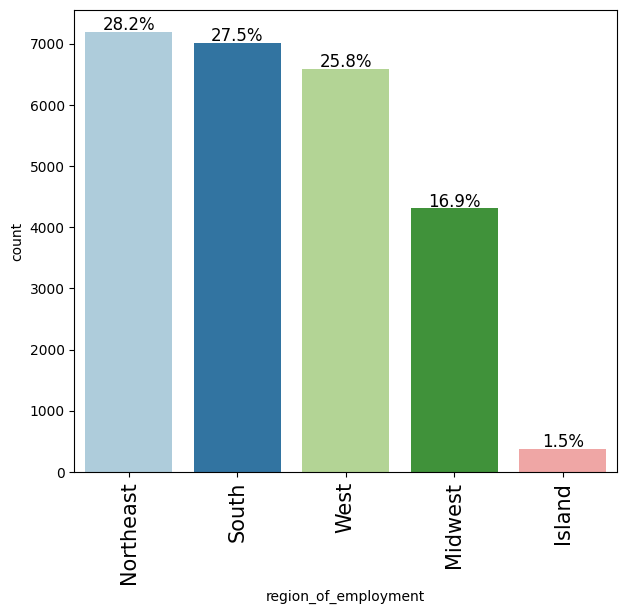

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True)

28.2% of the foreign worker's intended region of employment is in the Northeast region of the US, followed by 27.5% of the workers employment in the southern region.  

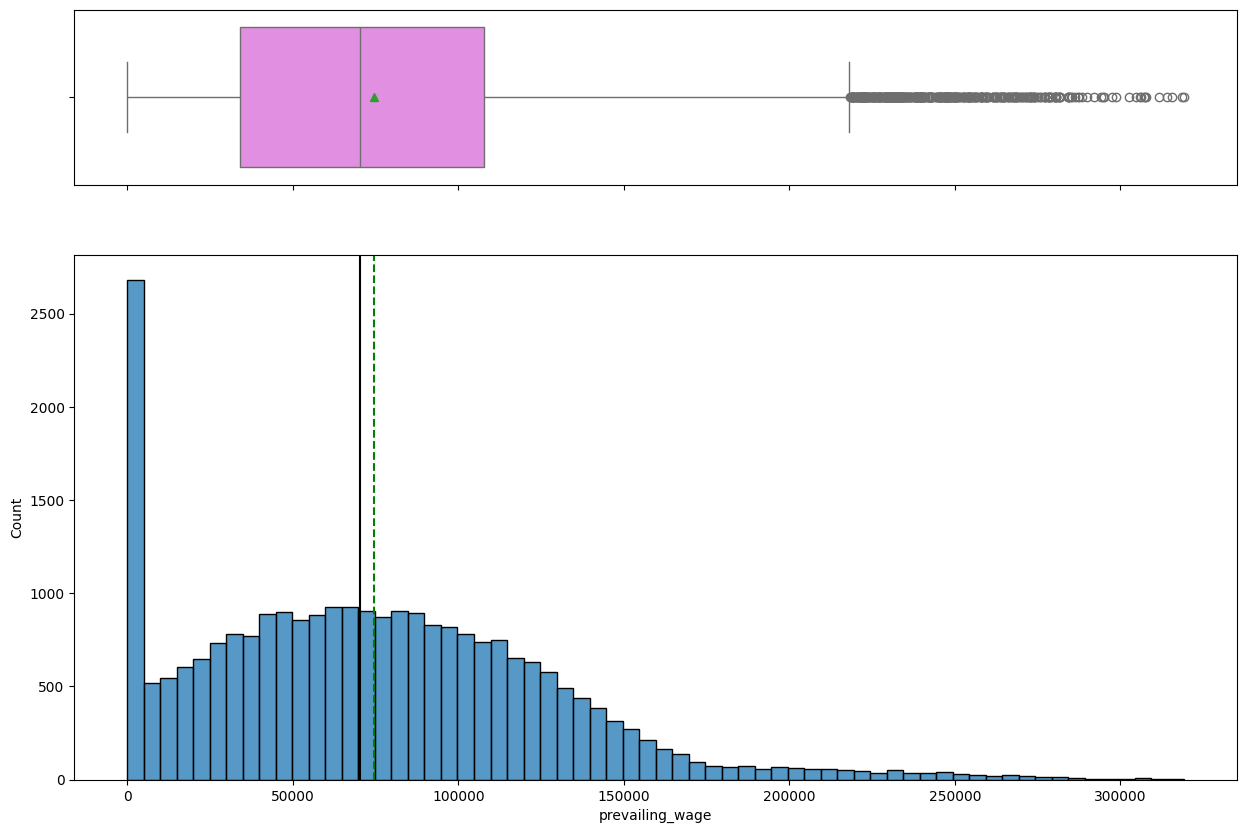

In [ ]:
histogram_boxplot(data,'prevailing_wage')

There are several outliers in the boxplot displayed, indicating that there are several workers being paid more than 225000.
On an average, the prevailing wage of an employee is about approx. 75000.

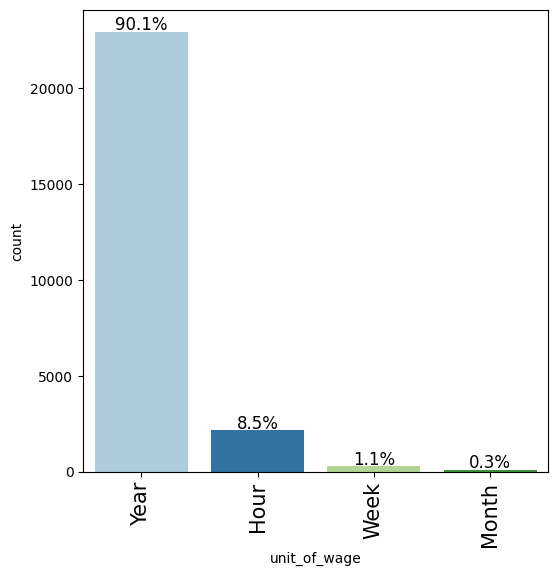

In [ ]:
labeled_barplot(data, "unit_of_wage", perc=True)

90.1% of the employees get paid annually while the unit of prevailing wage for 8.5% of the employees is by the hour.

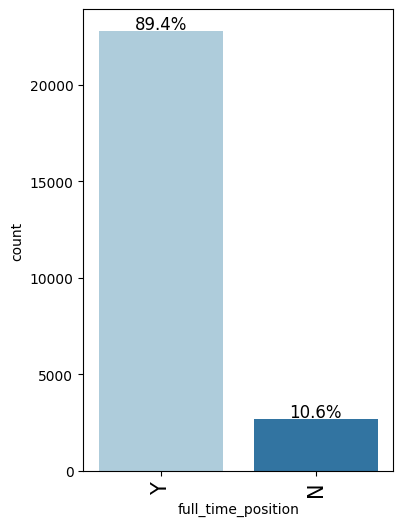

In [ ]:
labeled_barplot(data, "full_time_position", perc=True)

89.4% of the workers are hired for a full time position and 10.6% of the employees get hired for a part time position.

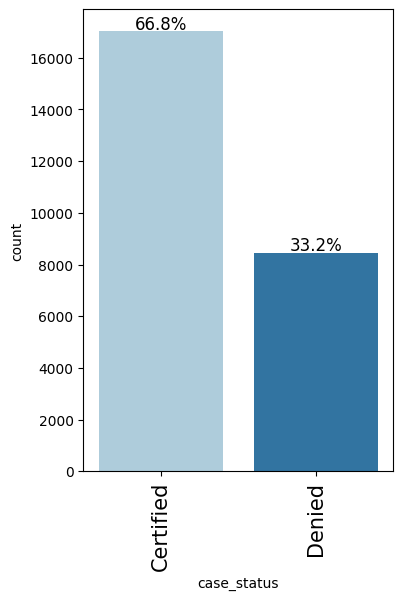

In [ ]:
labeled_barplot(data, "case_status", perc=True)

Visa is certified for about 66.8% of the workers and the visa is denied for the rest.

**BIVARIATE ANALYSIS**

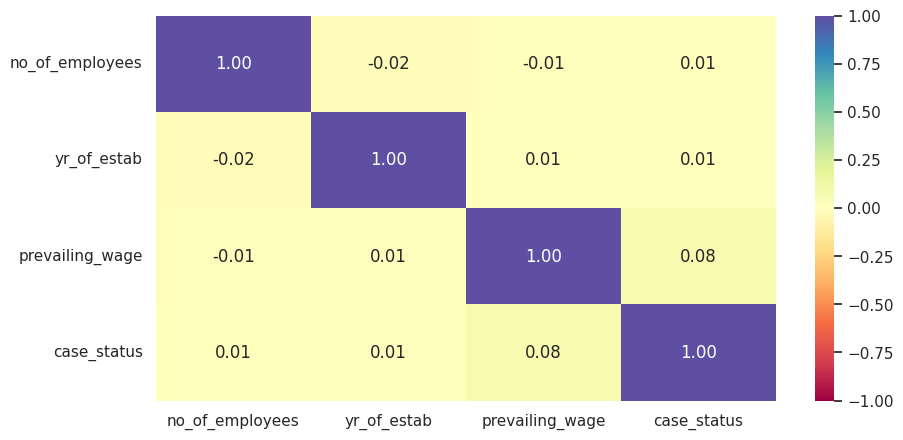

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

*   All the variables displayed in the heatmap are moderately correlated to one another.
*    Depending the status of the visa, wether it is certified or not, the
prevailing wages ranges accordingly.
*  The year an employer's company was established is negatively correlated to the number of employees.

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

case_status               0      1    All
education_of_employee                    
All                    8462  17018  25480
Bachelor's             3867   6367  10234
High School            2256   1164   3420
Master's               2059   7575   9634
Doctorate               280   1912   2192
------------------------------------------------------------------------------------------------------------------------


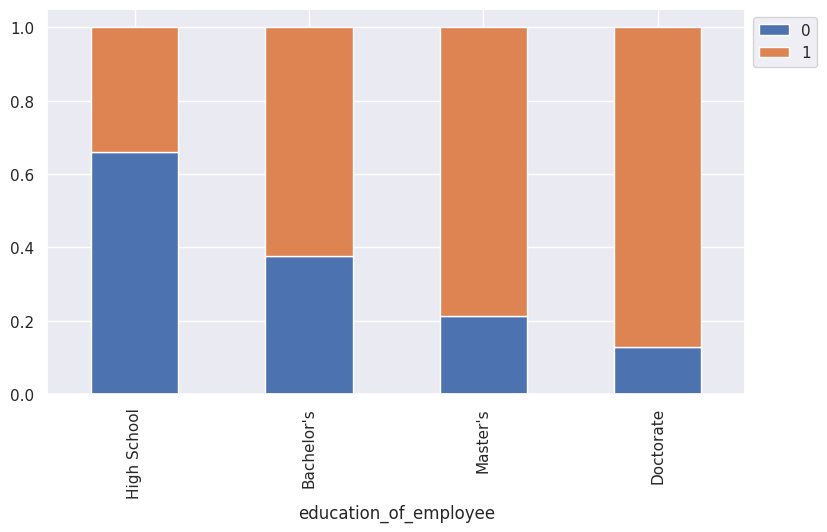

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

Employees educated upto to a high school level are mostly considered qualified enough to get a job and employees who hold a doctorate degree are less in number.

case_status      0      1    All
unit_of_wage                    
All           8462  17018  25480
Year          6915  16047  22962
Hour          1410    747   2157
Week           103    169    272
Month           34     55     89
------------------------------------------------------------------------------------------------------------------------


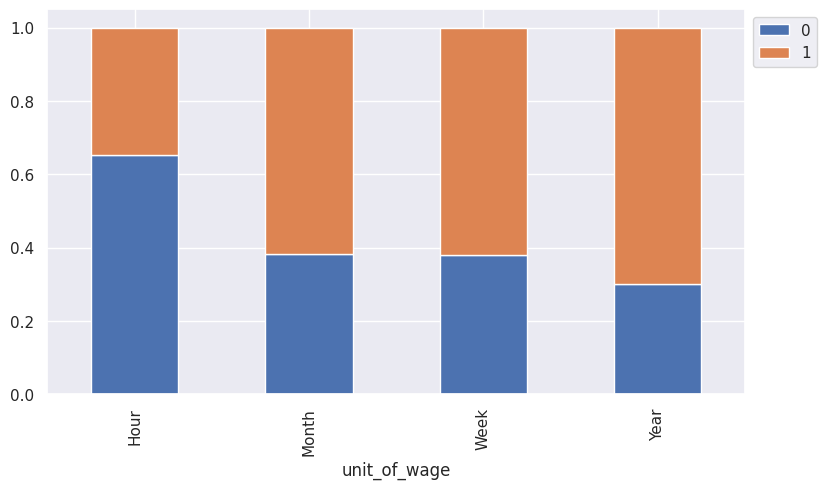

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status")

Depending on the wether the visa is certified, the unit wages of employees is mostly by the hour.

case_status       0      1    All
continent                        
All            8462  17018  25480
Asia           5849  11012  16861
North America  1255   2037   3292
Europe          775   2957   3732
South America   359    493    852
Africa          154    397    551
Oceania          70    122    192
------------------------------------------------------------------------------------------------------------------------


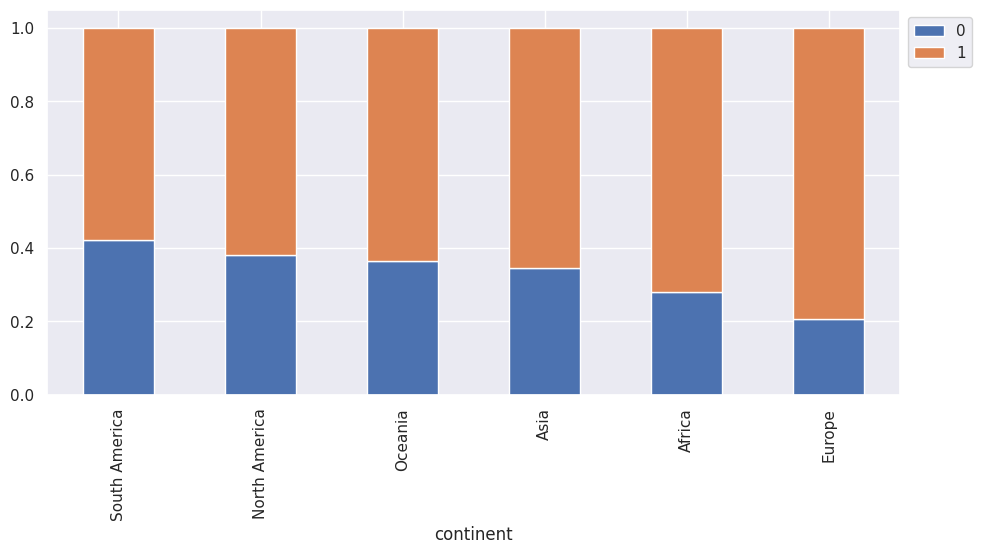

In [ ]:
stacked_barplot(data, "continent", "case_status")

Most of the employees' visas that are certified hail from South America, followed by North America.

case_status            0      1    All
has_job_experience                    
All                 8462  17018  25480
N                   4684   5994  10678
Y                   3778  11024  14802
------------------------------------------------------------------------------------------------------------------------


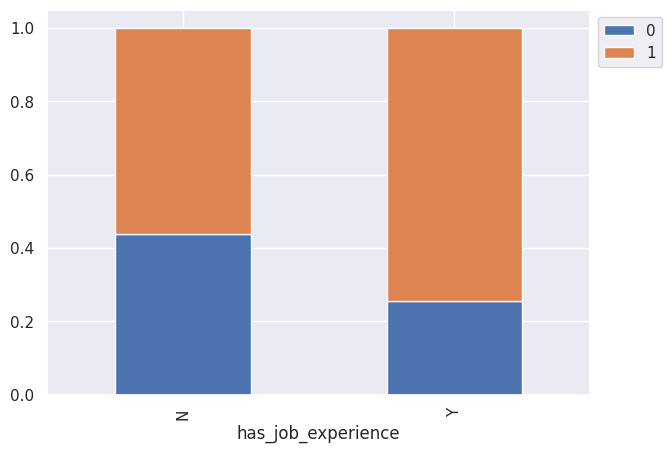

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")

Most of the employees workers do not a qualified job experience.

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


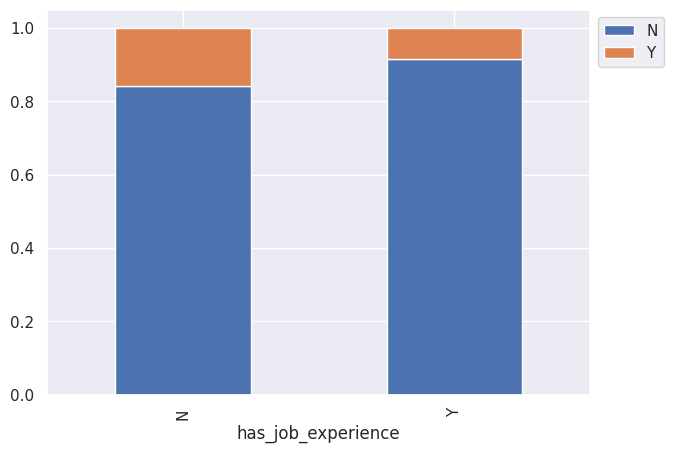

In [ ]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

Most of the employees' that already have a job experience do not require a job training.

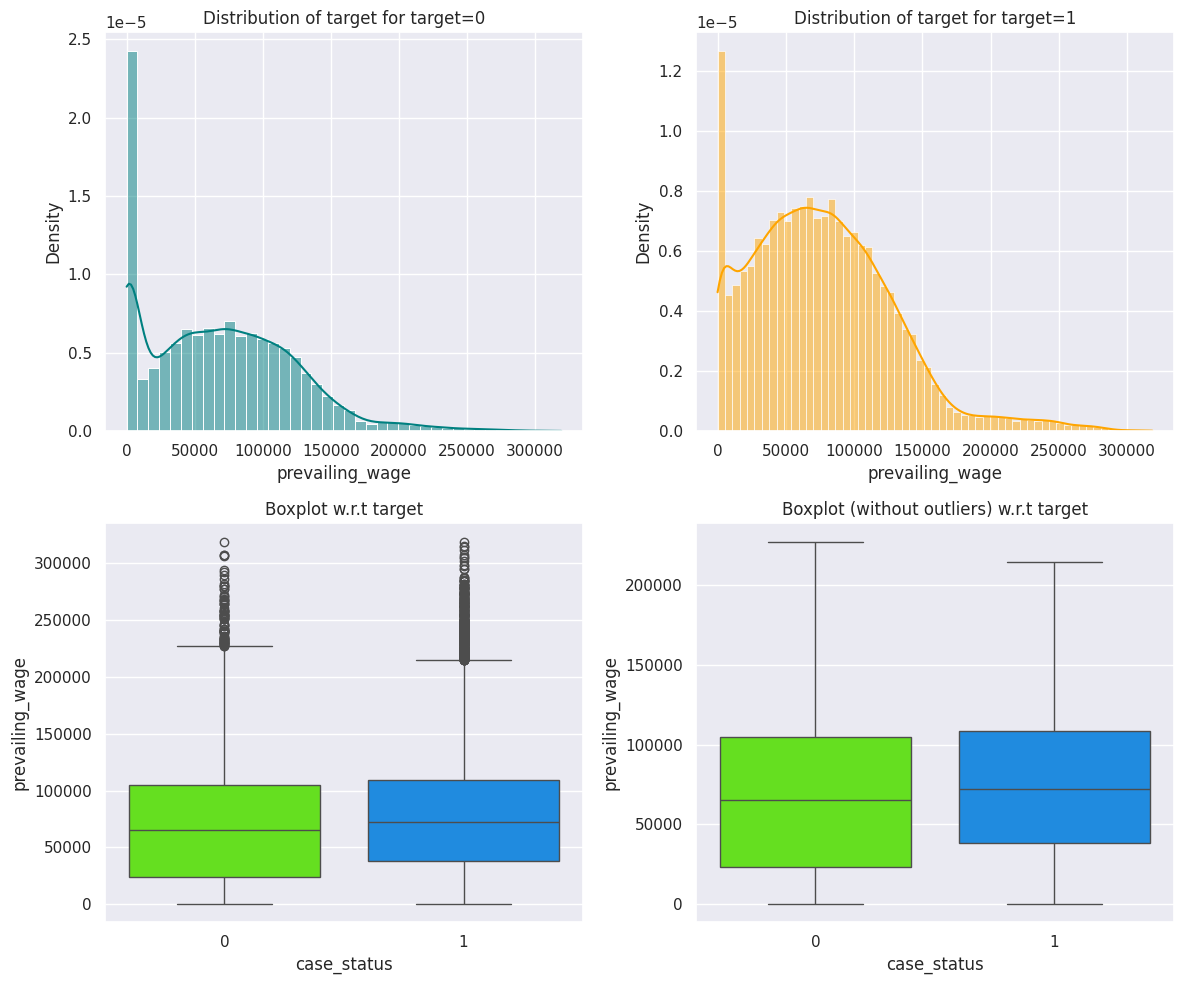

In [ ]:
distribution_plot_wrt_target(data,'prevailing_wage','case_status')

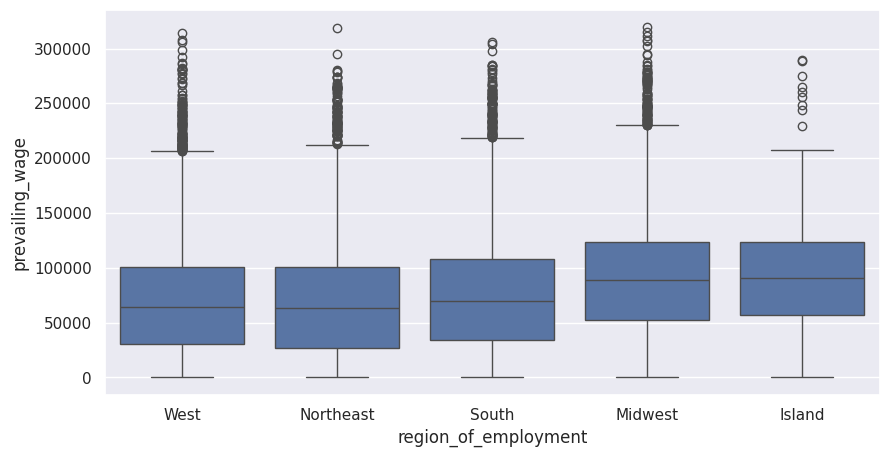

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df, x="region_of_employment", y="prevailing_wage"
)
plt.show()

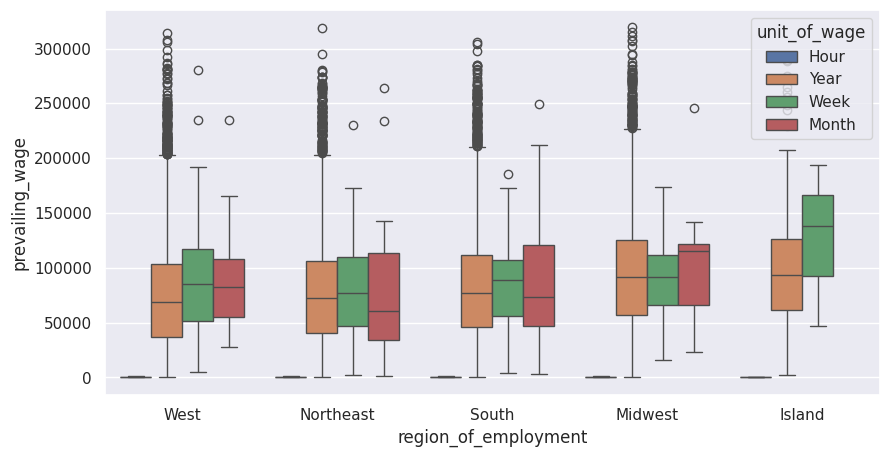

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data, x="region_of_employment", y="prevailing_wage",hue="unit_of_wage"
)
plt.show()

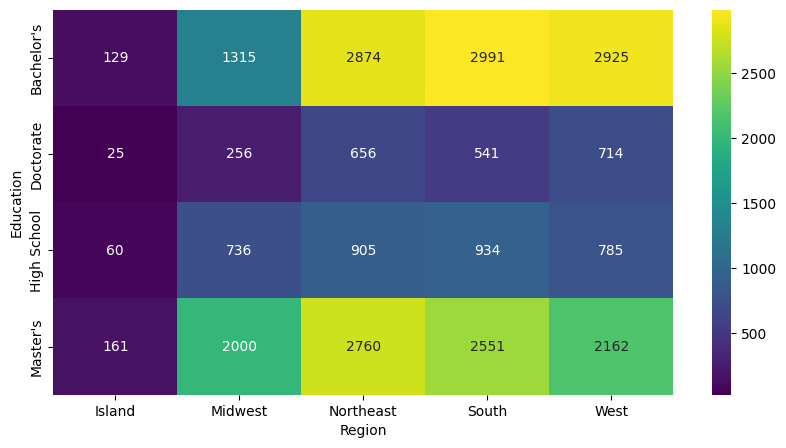

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(
    pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**MISSING VALUE TREATMENT**

In [ ]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

Since there are no missing values in the provided Dataset, the values do not need to be treated.

**OUTIER DETECTION AND TREATMENT**

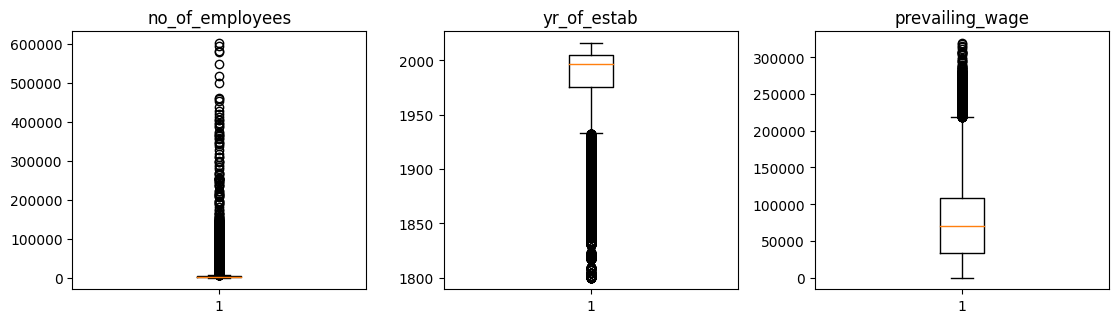

In [ ]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are several outliers as displayed in the boxplot. The outliers need not be treated as they are proper values.

**DATA PREPARATION FOR MODELING**

In [ ]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(['case_status'],axis=1)
Y = data["case_status"]

X = pd.get_dummies(X,drop_first=True)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1, shuffle=True)

In [ ]:
X_train.shape, X_test.shape

((17836, 21), (7644, 21))

In [ ]:
Y_train.value_counts(1)

1    0.663602
0    0.336398
Name: case_status, dtype: float64

In [ ]:
Y_test.value_counts(1)

1    0.677917
0    0.322083
Name: case_status, dtype: float64

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(Y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.663602
0    0.336398
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.677917
0    0.322083
Name: case_status, dtype: float64


The data has been divided into train and test sets

## EDA

- It is a good idea to explore the data once again after manipulating it.

**UNIVARIATE ANALYSIS**

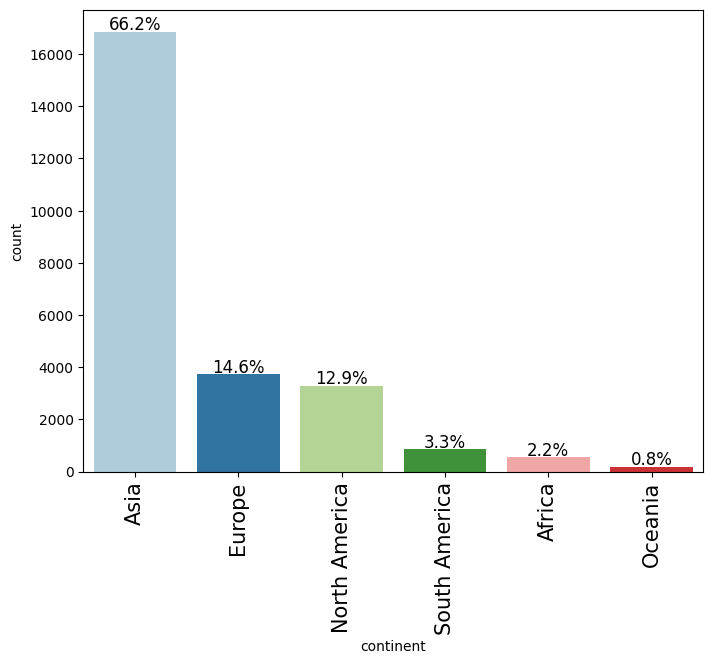

In [ ]:
labeled_barplot(data, "continent", perc=True)

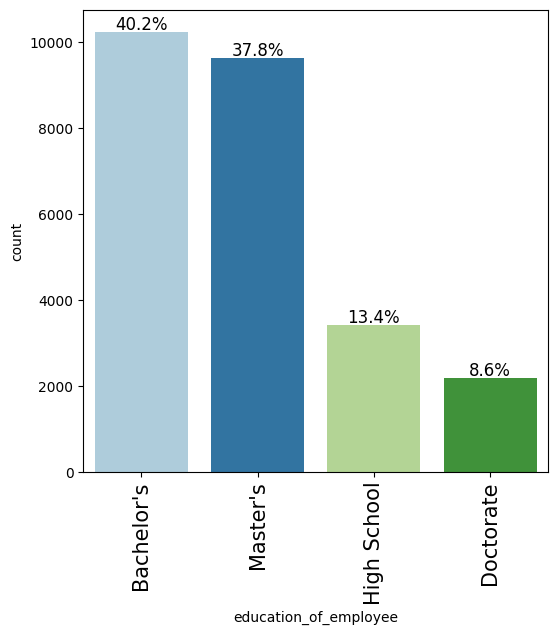

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True)

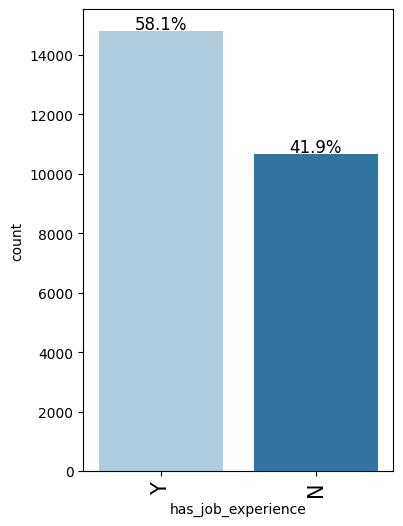

In [ ]:
labeled_barplot(data, "has_job_experience", perc=True)

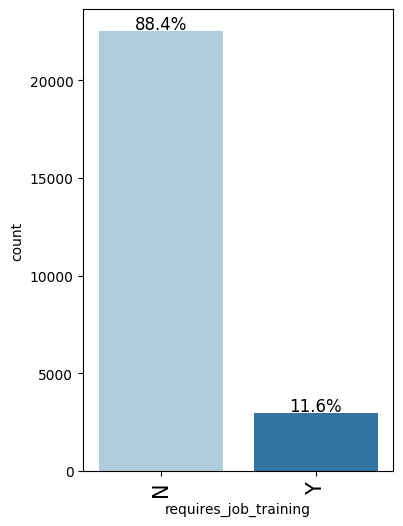

In [ ]:
labeled_barplot(data, "requires_job_training", perc=True)

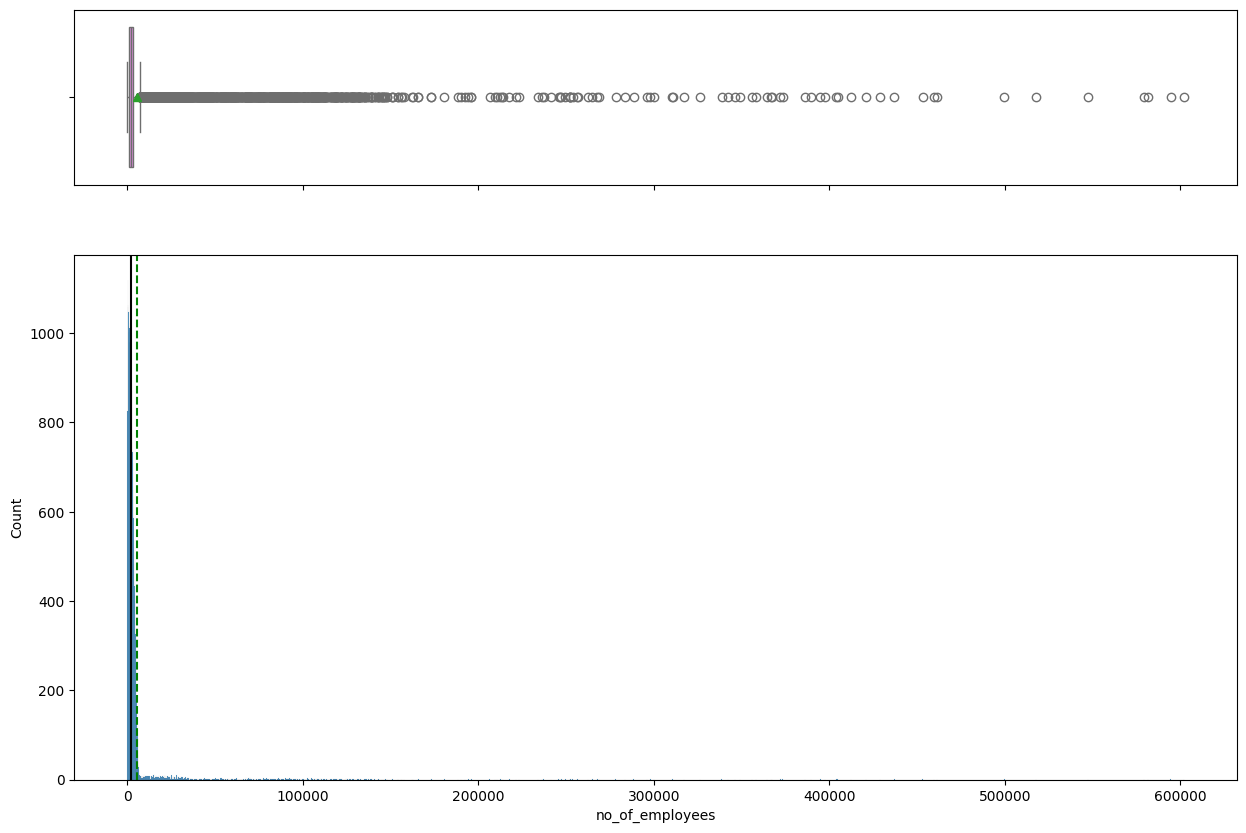

In [ ]:
histogram_boxplot(data,"no_of_employees")

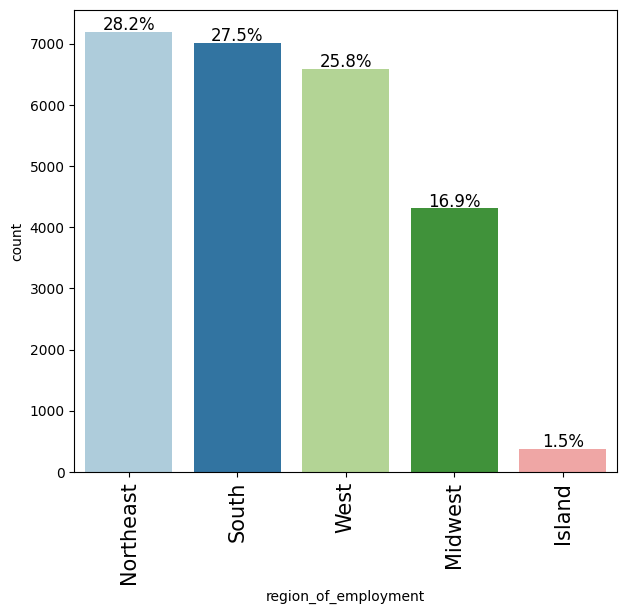

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True)

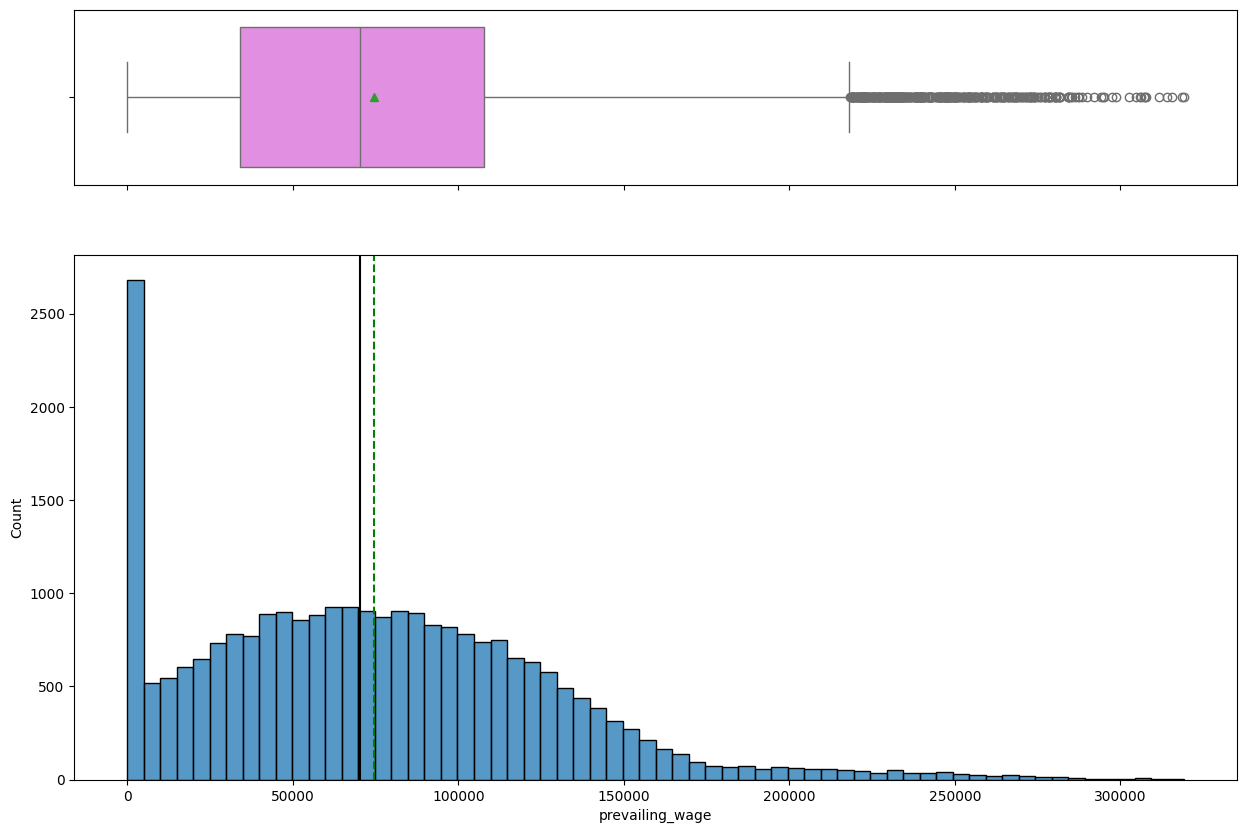

In [ ]:
histogram_boxplot(data,"prevailing_wage")

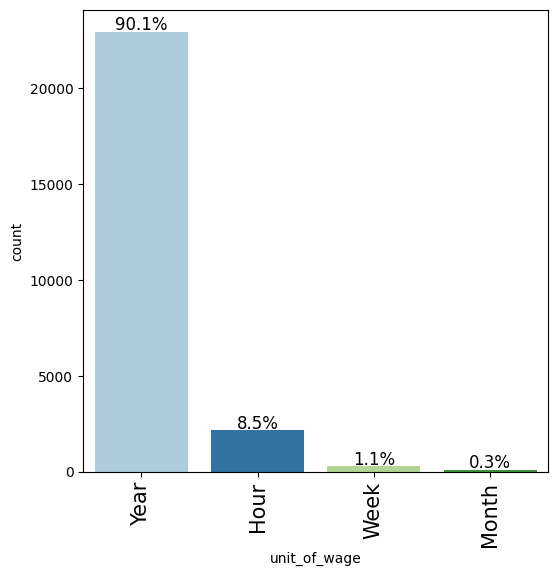

In [ ]:
labeled_barplot(data, "unit_of_wage", perc=True)

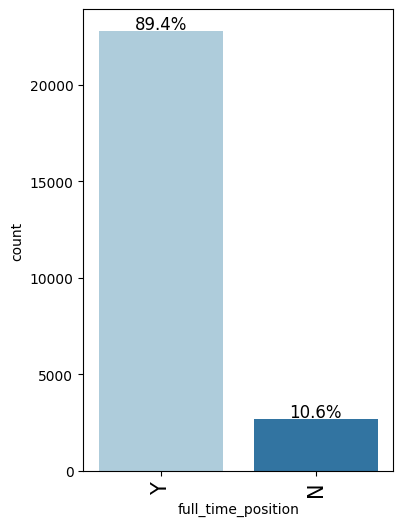

In [ ]:
labeled_barplot(data, "full_time_position", perc=True)

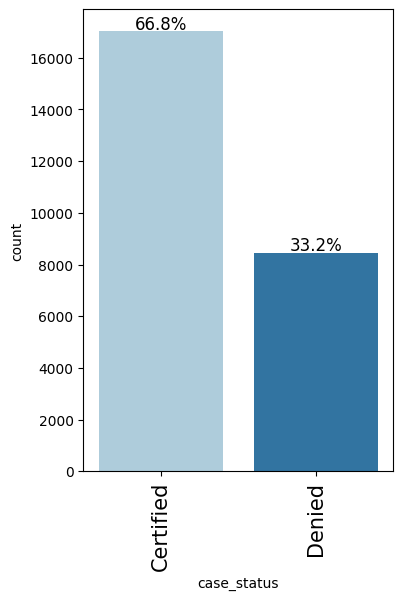

In [ ]:
labeled_barplot(data, "case_status", perc=True)

**BIVARIATE ANALYSIS**

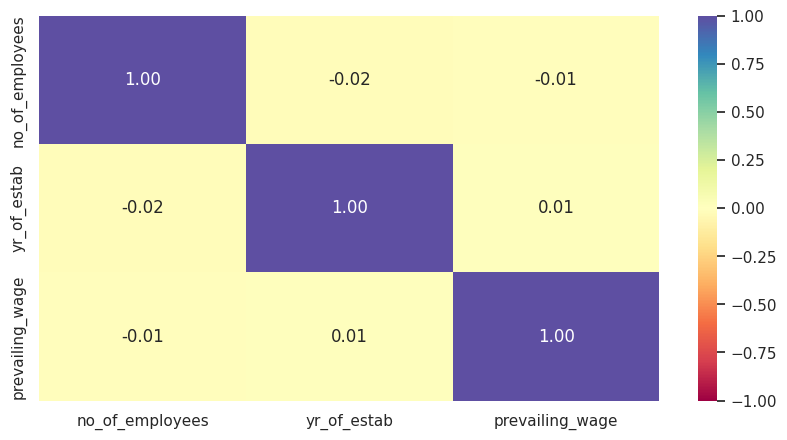

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

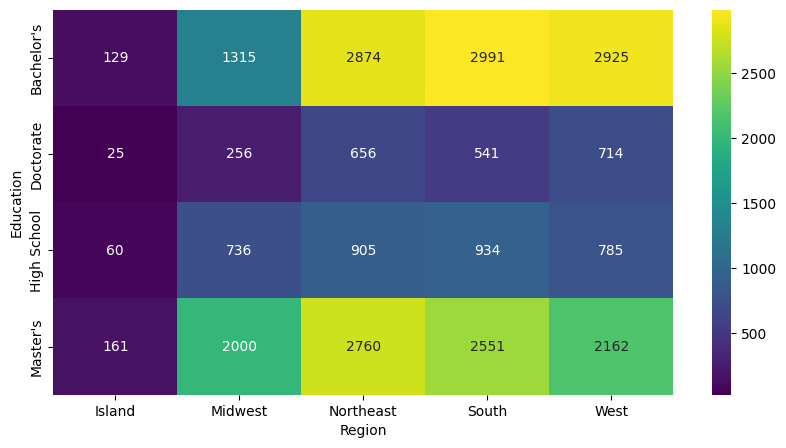

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(
    pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

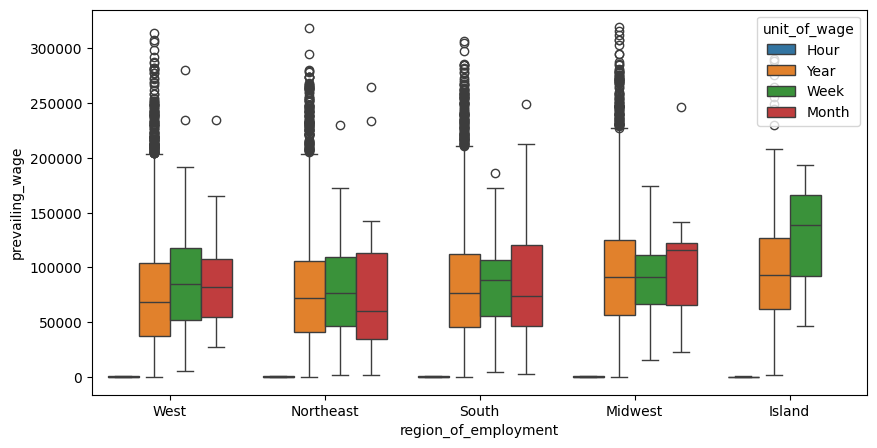

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data, x="region_of_employment", y="prevailing_wage",hue="unit_of_wage"
)
plt.show()

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


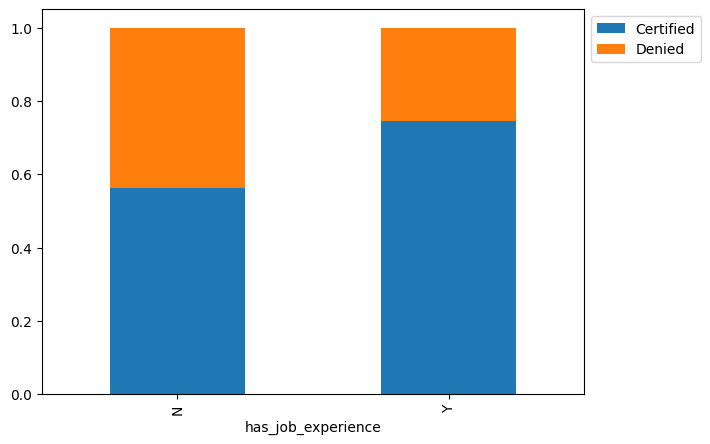

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


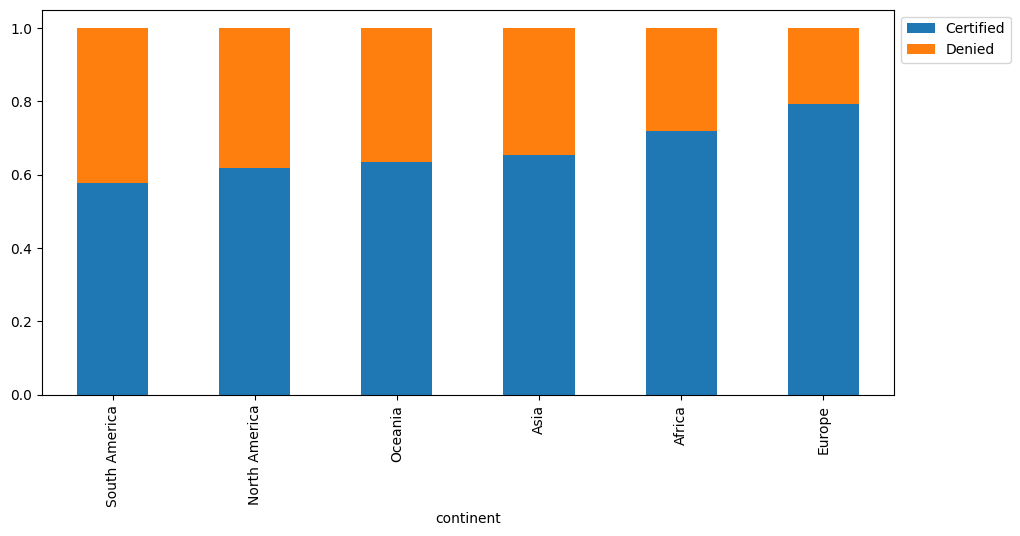

In [ ]:
stacked_barplot(data, "continent", "case_status")

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


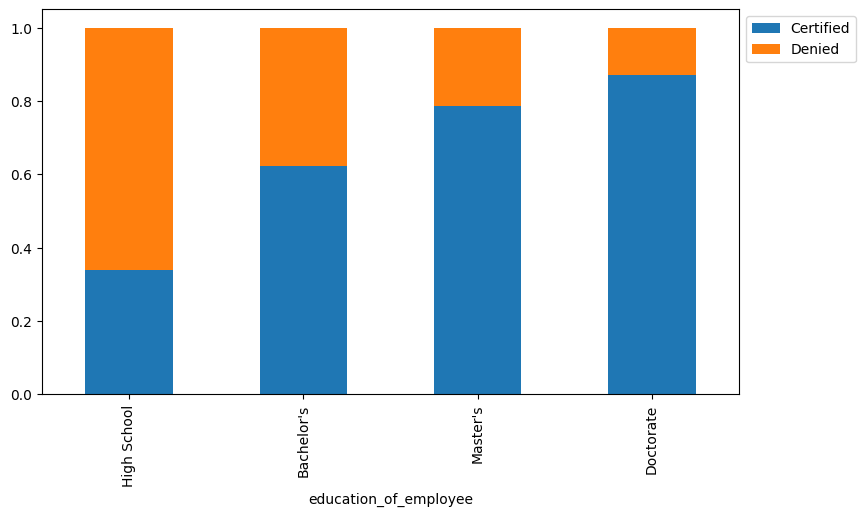

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


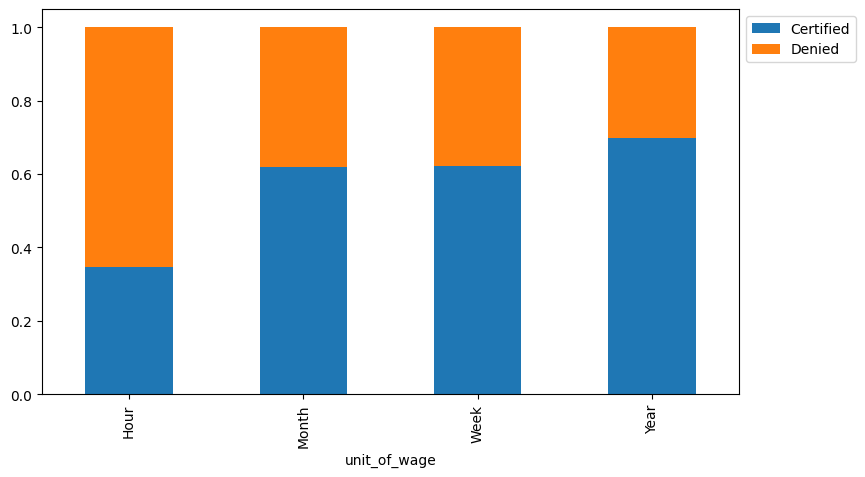

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status")

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


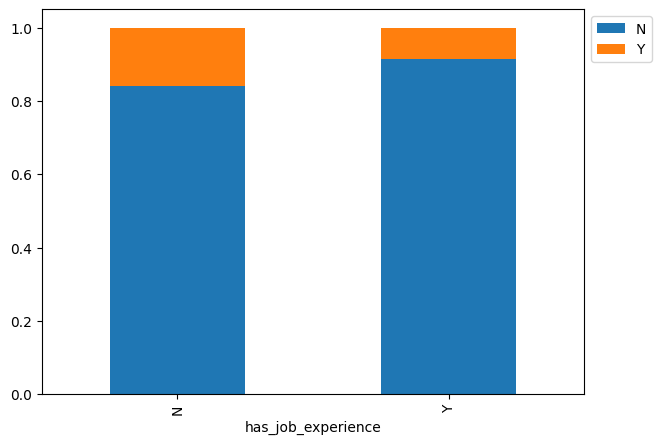

In [ ]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

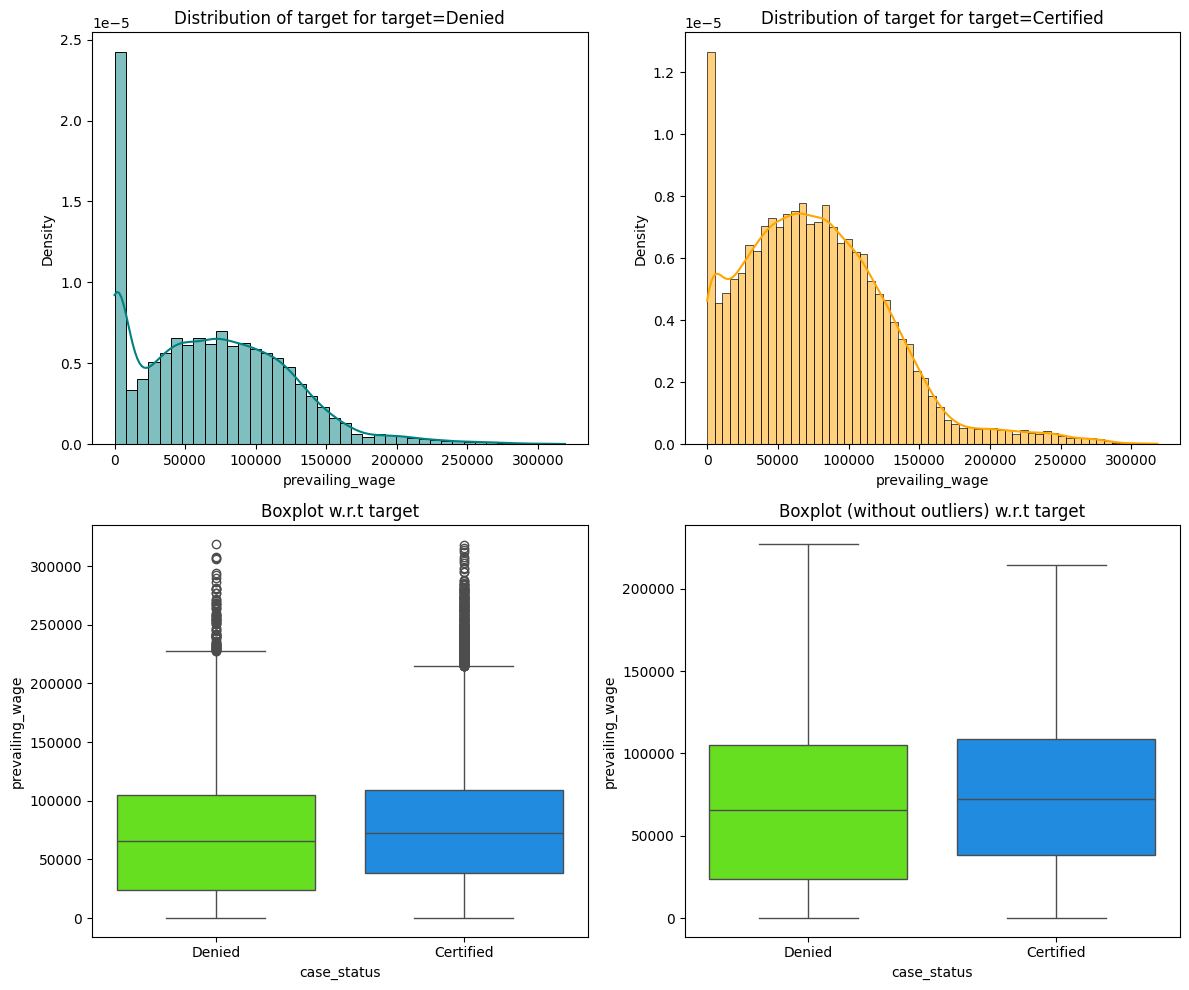

In [ ]:
distribution_plot_wrt_target(data,'prevailing_wage','case_status')

## Building bagging and boosting models

**MODEL EVALUATION CRITERION**

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):

    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**DECISION TREES**

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [ ]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

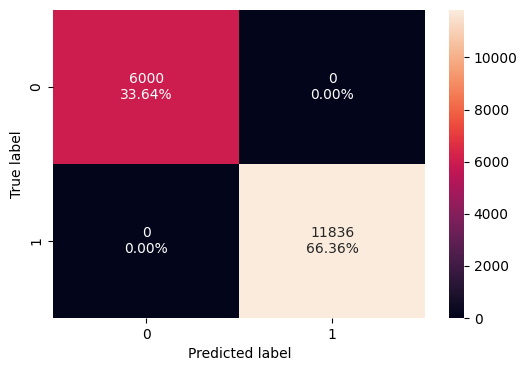

In [ ]:
confusion_matrix_sklearn(dtree, X_train, Y_train)

In [ ]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, Y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


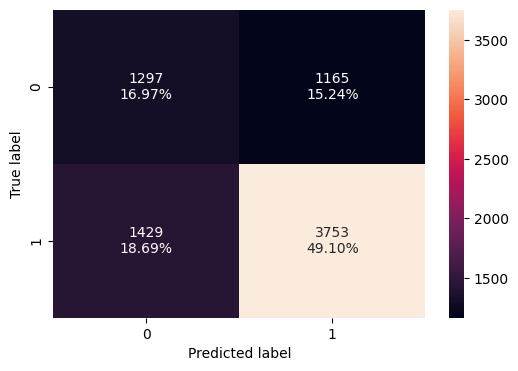

In [ ]:
confusion_matrix_sklearn(dtree, X_test, Y_test)

In [ ]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, Y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.660649  0.724238   0.763115  0.743168


Training performance displays accurate results than test performance of the model.

**BAGGING CLASSIFIER**

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,Y_train)

BaggingClassifier(random_state=1)

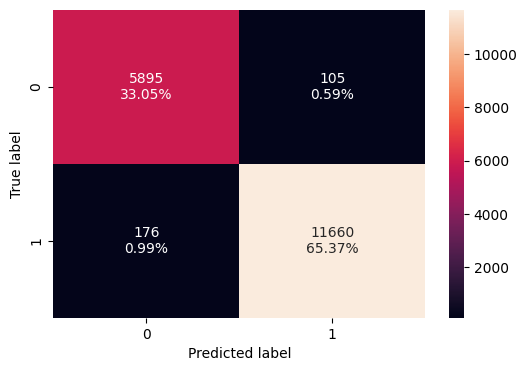

In [ ]:
confusion_matrix_sklearn(bagging, X_train, Y_train)

In [ ]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, Y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.984245  0.98513   0.991075  0.988094


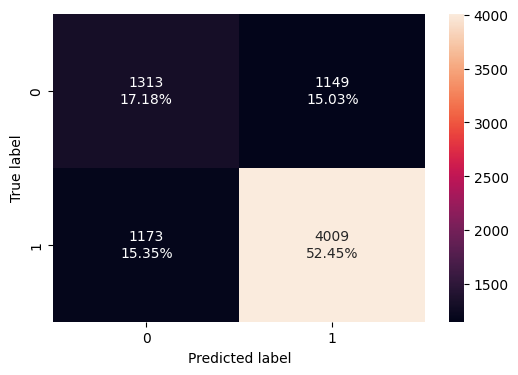

In [ ]:
confusion_matrix_sklearn(bagging, X_test, Y_test)

In [ ]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, Y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.696232  0.77364   0.777239  0.775435


There is a huge difference in the training and test set performance of the model. Training set provided better results than test set performance.

**RANDOM FOREST**

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=1)

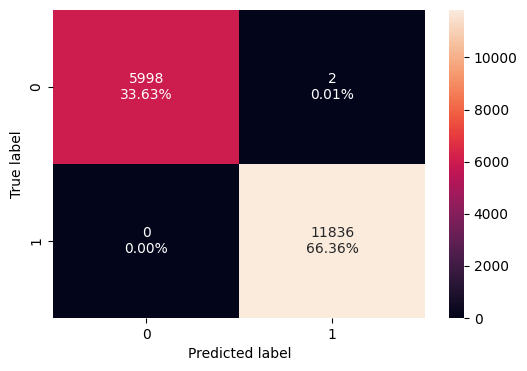

In [ ]:
confusion_matrix_sklearn(rf,X_train,Y_train)

In [ ]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,Y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.999888     1.0   0.999831  0.999916


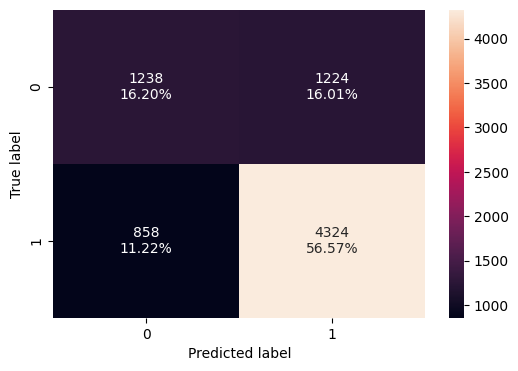

In [ ]:
confusion_matrix_sklearn(rf,X_test,Y_test)

In [ ]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,Y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.72763  0.834427    0.77938  0.805965


There seems to be a huge difference in the values of the training and testing performance of the model. Training set values have performed and provided better results than testing set values.

**BOOSTING - MODEL BUILDING**

**ADABOOST CLASSIFIER**

In [ ]:
ab = AdaBoostClassifier(random_state=1)
ab.fit(X_train,Y_train)

AdaBoostClassifier(random_state=1)

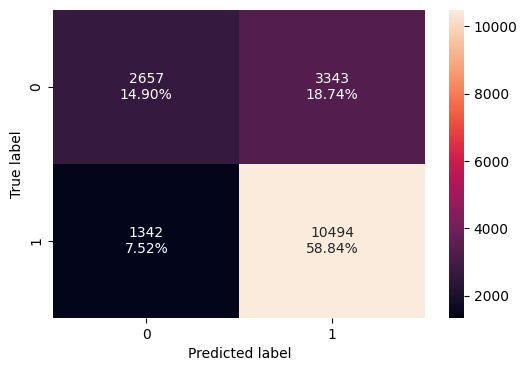

In [ ]:
confusion_matrix_sklearn(ab,X_train,Y_train)

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab, X_train,Y_train)
print("Training performance \n",ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.737329  0.886617   0.758401  0.817513


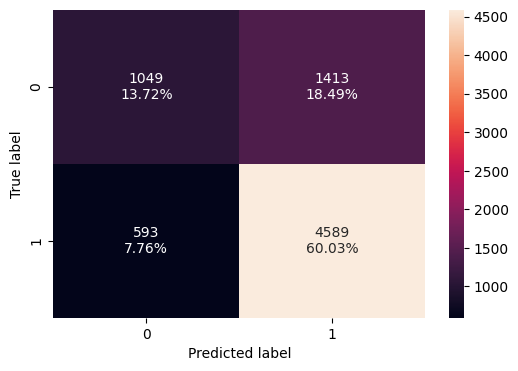

In [ ]:
confusion_matrix_sklearn(ab,X_test,Y_test)

In [ ]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab, X_test,Y_test)
print("Training performance \n",ab_classifier_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.737572  0.885565   0.764578  0.820637


The training and testing performance of the model seems to be quite accurate and close to one another.

**GRADIENT BOOSTING**

In [ ]:
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=1)

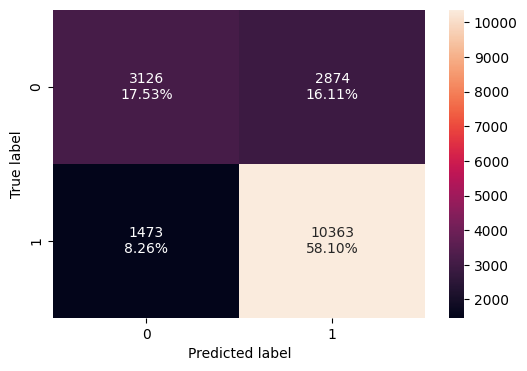

In [ ]:
confusion_matrix_sklearn(gb,X_train,Y_train)

In [ ]:
gb_model_train_perf = model_performance_classification_sklearn(gb, X_train,Y_train)
print("Training performance \n",gb_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.756279  0.875549   0.782881  0.826626


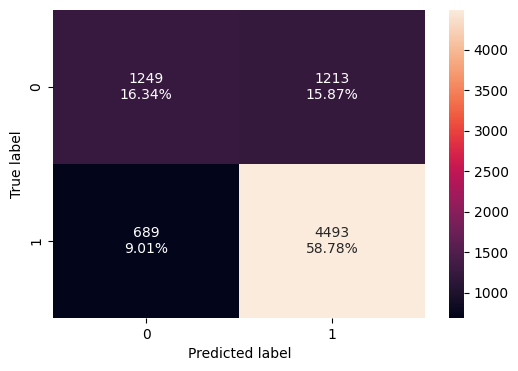

In [ ]:
confusion_matrix_sklearn(gb,X_test,Y_test)

In [ ]:
gb_model_test_perf = model_performance_classification_sklearn(gb, X_test, Y_test)
print("Testing performance \n",gb_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.751177  0.86704   0.787417  0.825312


The training and testing performance of the model seems to be quite accurate and close to one another.

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

##  Will tuning the hyperparameters improve the model performance?

**HYPERTUNING DECISION TREES**

In [ ]:
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

parameters = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001],
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, Y_train)

dtree_estimator = grid_obj.best_estimator_

dtree_estimator.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, random_state=1)

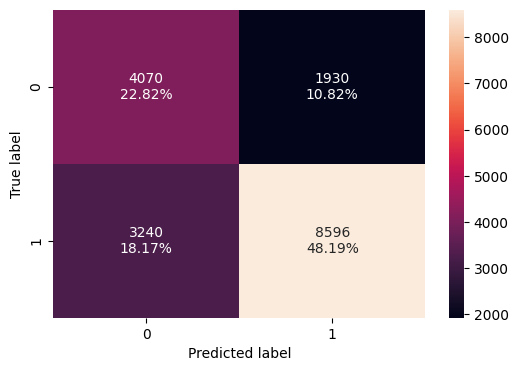

In [ ]:
confusion_matrix_sklearn(dtree_estimator,X_train,Y_train)

In [ ]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,Y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.710137  0.726259   0.816644  0.768804


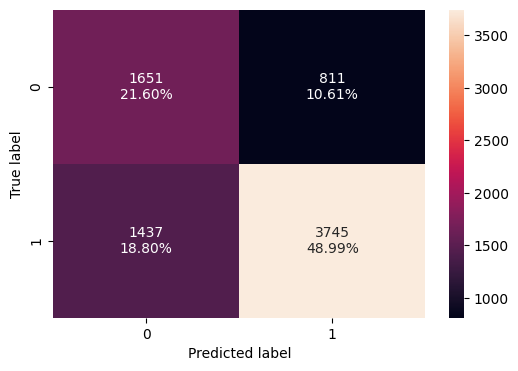

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test,Y_test)

In [ ]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, Y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.705913  0.722694   0.821993  0.769152


The training and test performance results are close to one another after hypertuning the model.

**HYPERTUNING BAGGING CLASSIFIER**

In [ ]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid = GridSearchCV(bagging_estimator_tuned, param_grid, scoring='recall',cv=5)
grid = grid.fit(X_train, Y_train)

bagging_estimator_tuned  = grid.best_estimator_
bagging_estimator_tuned.fit(X_train,Y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=50,
                  random_state=1)

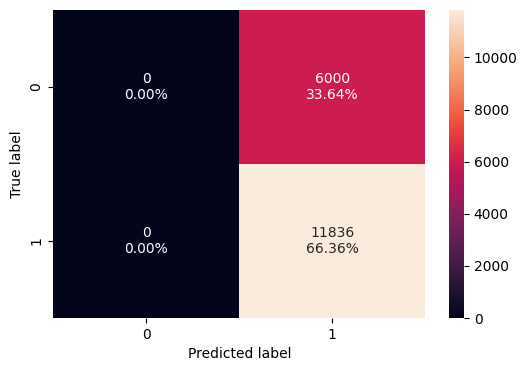

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train,Y_train)

In [ ]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_train,Y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.663602     1.0   0.663602  0.797789


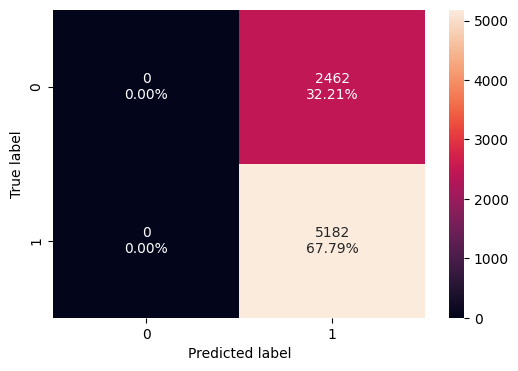

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test,Y_test)

In [ ]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_test, Y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision        F1
0  0.677917     1.0   0.677917  0.808046


There is no siginificant change in the performance of the training and test sets after hypertuning the model. Both models display similar results.

**HYPERTUNING RANDOM FOREST**

In [ ]:
rf_estimator = RandomForestClassifier(random_state=1)

parameters = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

rf_estimator = grid_obj.best_estimator_

rf_estimator.fit(X_train, Y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110,
                       random_state=1)

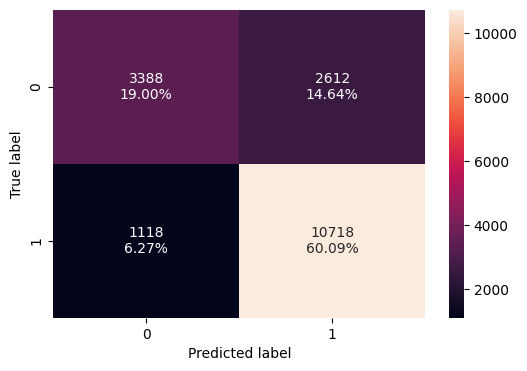

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_train,Y_train)

In [ ]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,Y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.790872  0.905542   0.804051  0.851784


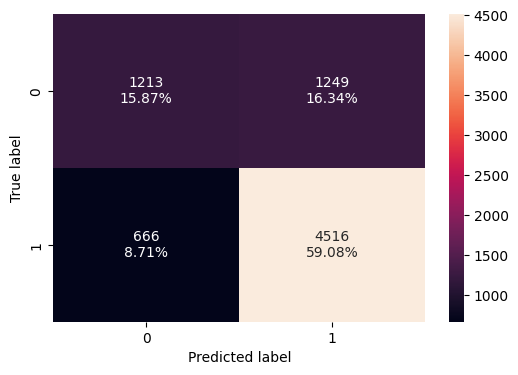

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_test,Y_test)

In [ ]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, Y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.749477  0.871478   0.783348  0.825066


After hypertuning the random forest model, the testing performance of the model has improved and it's values are almost quite accuarte to the training performance, although not quite.

In [ ]:
print(pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
prevailing_wage                    0.212375
no_of_employees                    0.165879
yr_of_estab                        0.141278
education_of_employee_High School  0.127449
has_job_experience_Y               0.083363
education_of_employee_Master's     0.059592
unit_of_wage_Year                  0.031266
education_of_employee_Doctorate    0.028716
continent_Europe                   0.023558
region_of_employment_West          0.016642
region_of_employment_Midwest       0.015846
continent_North America            0.014924
continent_Asia                     0.014915
region_of_employment_South         0.014041
full_time_position_Y               0.013998
region_of_employment_Northeast     0.013328
requires_job_training_Y            0.013183
continent_South America            0.006085
unit_of_wage_Week                  0.001538
continent_Oceania                  0.001507
unit_of_wage_Month                 0.000517


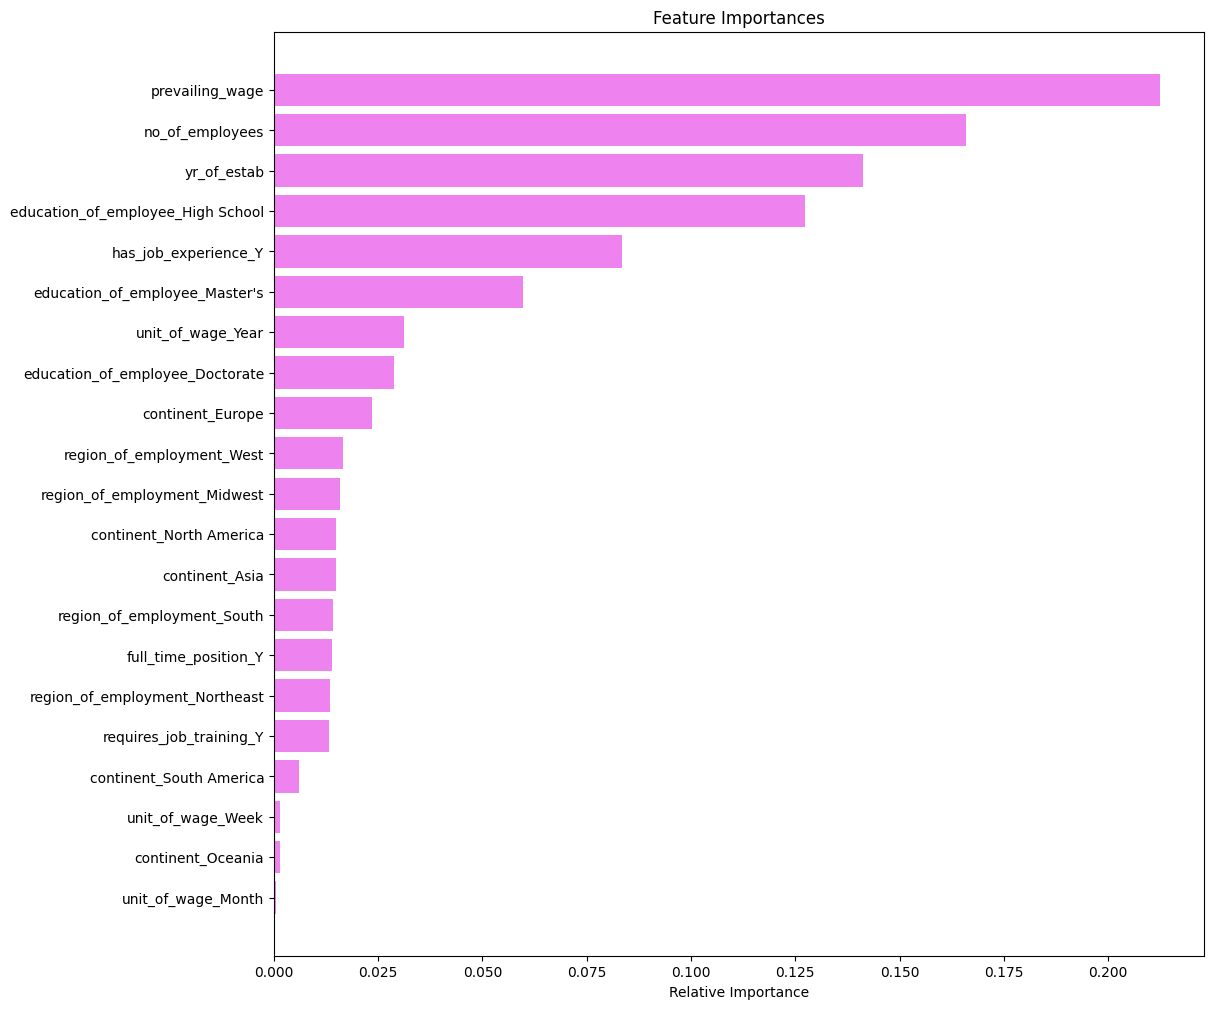

In [ ]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

1. It can be observed from the graph that prevailing wages of the employees seems to be the most important feature in the Random Forest Model.
2. Followed by prevailing wage, The number of employees in the employer's company and year in which the employer's company was establised are the most important features.

**HYPERTUNING ADABOOST CLASSIFIER**

In [ ]:
ab_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

ab_tuned = grid_obj.best_estimator_

ab_tuned.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, random_state=1)

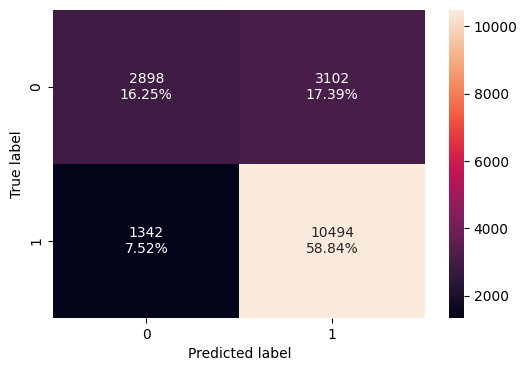

In [ ]:
confusion_matrix_sklearn(ab_tuned,X_train,Y_train)

In [ ]:
ab_tuned_model_train_perf = model_performance_classification_sklearn(ab_tuned, X_train,Y_train)
print("Training performance \n",ab_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.750841  0.886617   0.771845  0.82526


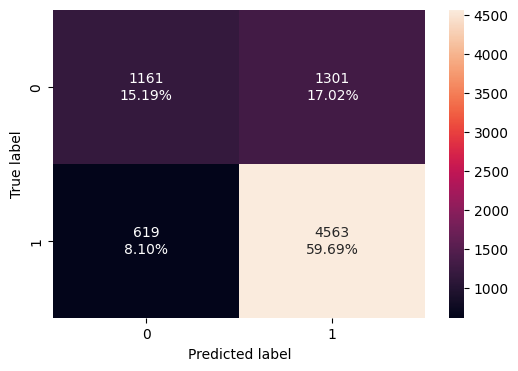

In [ ]:
confusion_matrix_sklearn(ab_tuned,X_test,Y_test)

In [ ]:
ab_tuned_model_test_perf = model_performance_classification_sklearn(ab_tuned, X_test,Y_test)
print("Testing performance \n",ab_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.748823  0.880548   0.778138  0.826181


There seems to be no difference in the values of the accuracy of the performance of training and testing sets.

In [ ]:
print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.122197
has_job_experience_Y               0.117435
education_of_employee_Master's     0.103890
continent_Europe                   0.085282
prevailing_wage                    0.084731
education_of_employee_Doctorate    0.082994
region_of_employment_Midwest       0.057182
region_of_employment_South         0.056713
unit_of_wage_Year                  0.053288
no_of_employees                    0.049415
full_time_position_Y               0.035802
continent_North America            0.030076
region_of_employment_West          0.029762
continent_South America            0.029505
yr_of_estab                        0.025844
requires_job_training_Y            0.023955
region_of_employment_Northeast     0.007948
continent_Asia                     0.003982
continent_Oceania                  0.000000
unit_of_wage_Month                 0.000000
unit_of_wage_Week                  0.000000


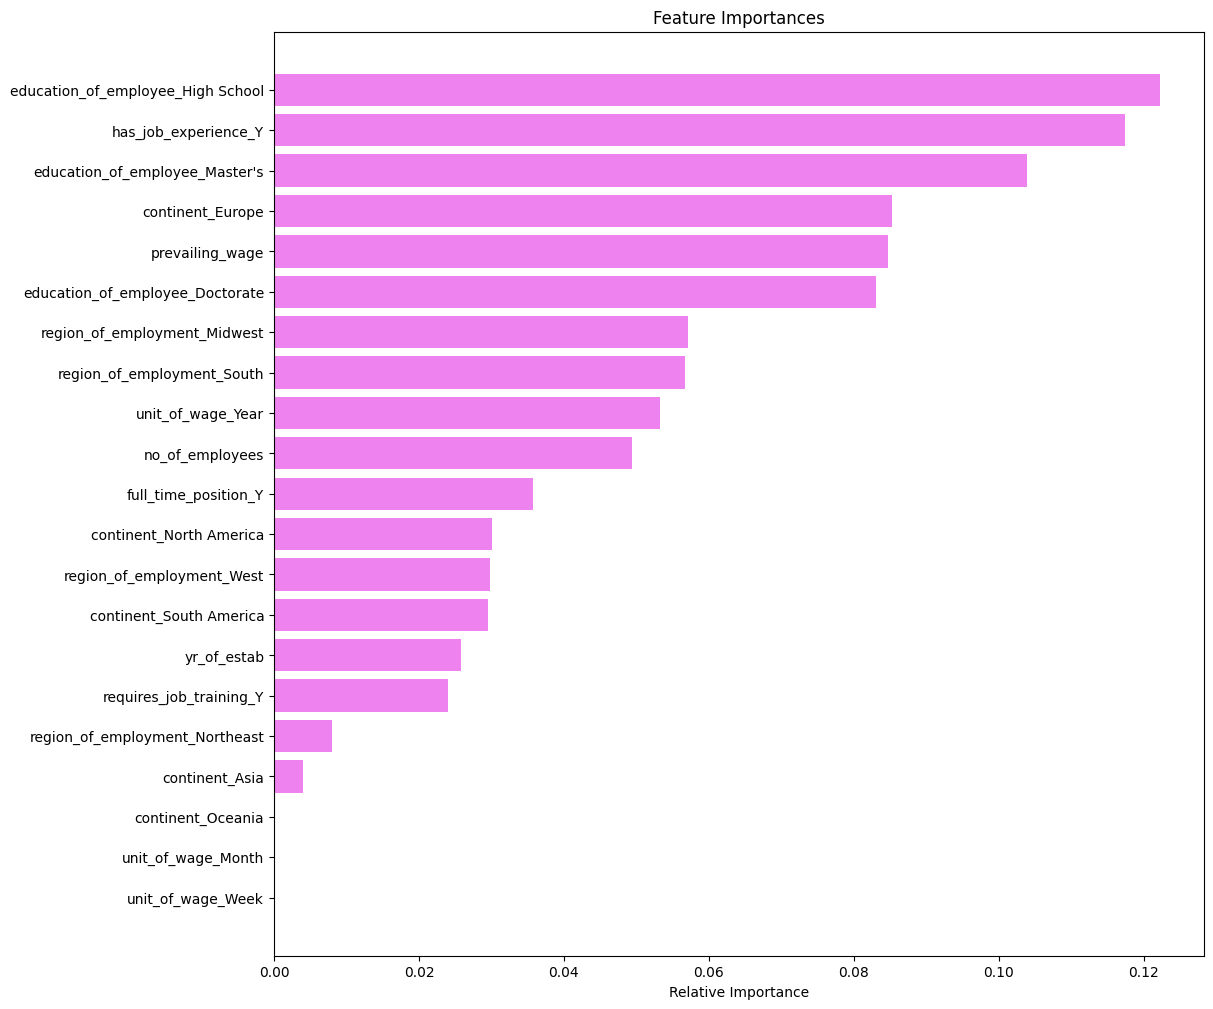

In [ ]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

1. After tuning the Gradient Boosting Model, it can be noted from the features importances graph that the education of an employee, who is based off of just high school level seems to be relatively more important than an employee that holds a Master's degree.
2. It also seems to be important for the employee to have had job experience.

**HYPERTUNING GRADIENT BOOST CLASSIFIER**

In [ ]:
gb_tuned = GradientBoostingClassifier(random_state=1)

parameters = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

gb_tuned = grid_obj.best_estimator_

gb_tuned.fit(X_train, Y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.5,
                           n_estimators=75, random_state=1, subsample=0.7)

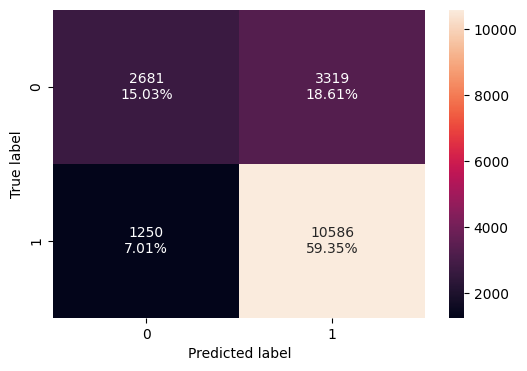

In [ ]:
confusion_matrix_sklearn(gb_tuned,X_train,Y_train)

In [ ]:
gb_tuned_model_train_perf = model_performance_classification_sklearn(gb_tuned, X_train,Y_train)
print("Training performance \n",gb_tuned_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.743833  0.89439   0.761309  0.822501


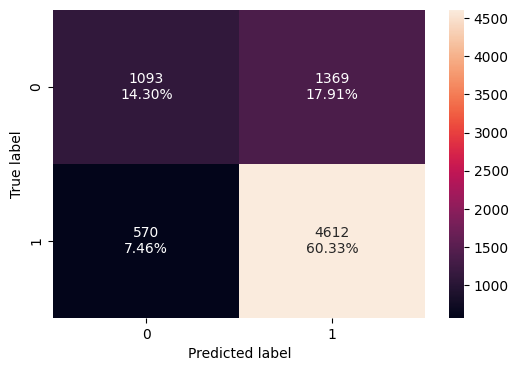

In [ ]:
confusion_matrix_sklearn(gb_tuned,X_test,Y_test)

In [ ]:
gb_tuned_model_test_perf = model_performance_classification_sklearn(gb_tuned, X_test, Y_test)
print("Testing performance \n",gb_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.746337  0.890004   0.771109  0.826301


After the tuning the model, there seem to be no difference in the values of the training and testing performance.

In [ ]:
print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.268752
has_job_experience_Y               0.184023
education_of_employee_Master's     0.135535
prevailing_wage                    0.105784
unit_of_wage_Year                  0.071755
education_of_employee_Doctorate    0.067259
continent_Europe                   0.058490
region_of_employment_Midwest       0.029049
region_of_employment_South         0.017531
region_of_employment_West          0.017250
continent_North America            0.015393
no_of_employees                    0.006694
continent_Asia                     0.004729
yr_of_estab                        0.004422
region_of_employment_Northeast     0.003849
full_time_position_Y               0.002928
continent_South America            0.002891
requires_job_training_Y            0.001346
unit_of_wage_Week                  0.001254
continent_Oceania                  0.001065
unit_of_wage_Month                 0.000000


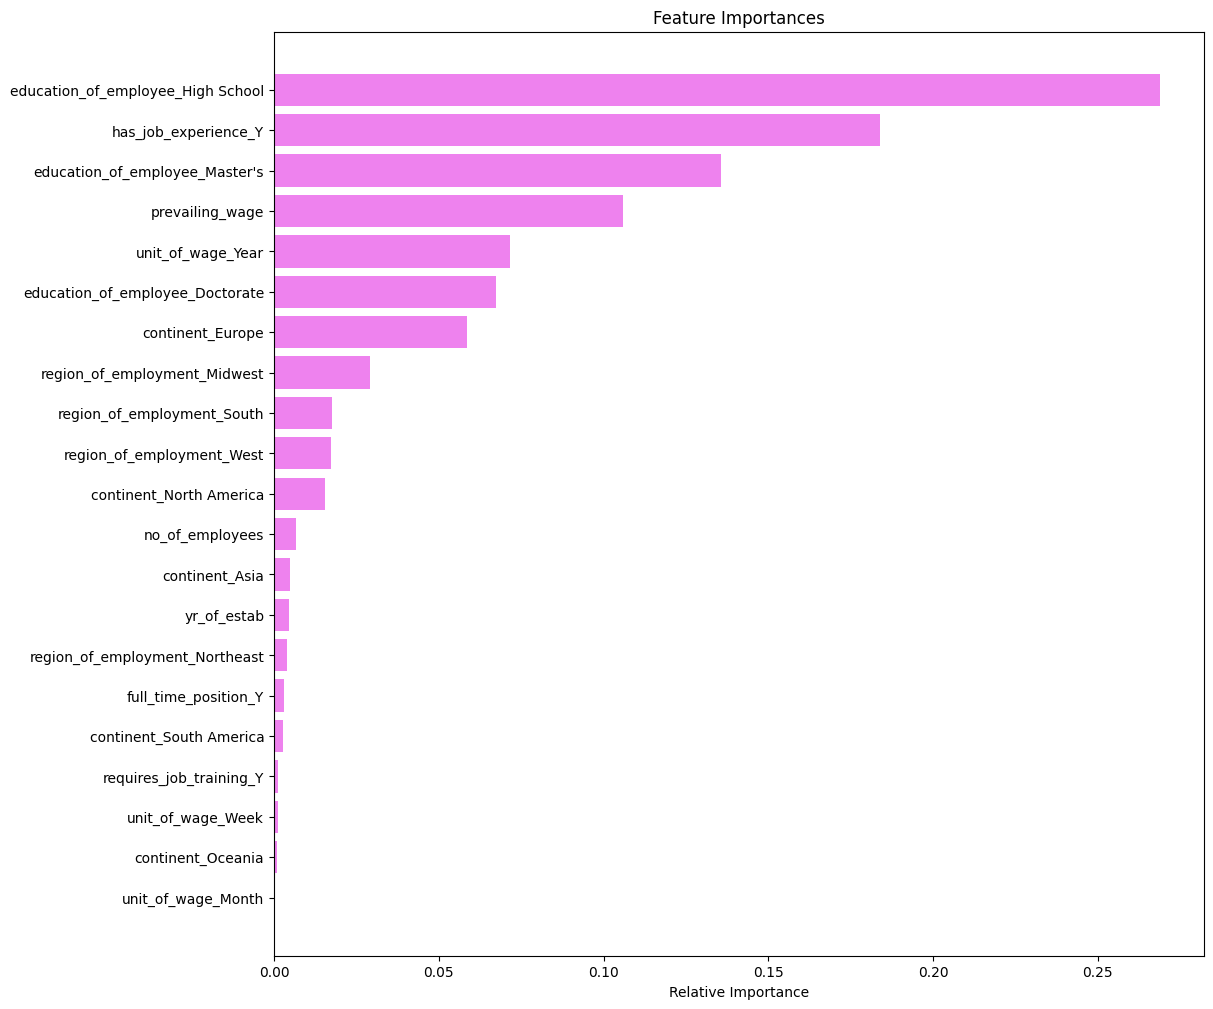

In [ ]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The graph displayed of the Gradient Boosting Model shows similar results to that of AdaBoosting Model.

**STACKING MODEL CLASSIFIERS**

In [ ]:
estimators=[('Decision Tree', dtree_estimator),('Random Forest', rf_estimator),
           ('Ada Boosting', ab_tuned)]
final_estimator=GradientBoostingClassifier(random_state=1)

In [ ]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,Y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=5,
                                                       max_leaf_nodes=15,
                                                       min_impurity_decrease=0.0001,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_samples=0.4,
                                                       min_samples_leaf=3,
                                                       n_estimators=110,
                                                       random_state=1)),
                               ('Ada Boosting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   random_state=1))],
                   final_estimator=GradientBoostingClassifier(random_state=1))

In [ ]:
stacking_estimator_model_train_perf = model_performance_classification_sklearn(stacking_estimator, X_train, Y_train)
print("Training performance \n",stacking_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.768109  0.885265   0.790435  0.835167


In [ ]:
stacking_estimator_model_test_perf = model_performance_classification_sklearn(stacking_estimator, X_test, Y_test)
print("Testing performance \n",stacking_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.750785  0.864724   0.788215  0.824699


## Model Performance Comparison and Conclusions

In [ ]:
models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T, dtree_estimator_model_train_perf.T, bagging_model_train_perf.T, bagging_estimator_model_train_perf.T, rf_estimator_model_train_perf.T,
    rf_model_train_perf.T, ab_classifier_model_train_perf.T,ab_tuned_model_train_perf.T,gb_model_train_perf.T,gb_tuned_model_train_perf.T, stacking_estimator_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging Classifier Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adaboost Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Tuned",
    "Stacking Classifier"
]

print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging Classifier Tuned,Random Forest,Random Forest Tuned,Adaboost Classifier,Adaboost Tuned,Gradient Boost Classifier,Gradient Boost Tuned,Stacking Classifier
Accuracy,1.0,0.710137,0.984245,0.663602,0.790872,0.999888,0.737329,0.750841,0.756279,0.743833,0.768109
Recall,1.0,0.726259,0.985130,1.000000,0.905542,1.000000,0.886617,0.886617,0.875549,0.894390,0.885265
Precision,1.0,0.816644,0.991075,0.663602,0.804051,0.999831,0.758401,0.771845,0.782881,0.761309,0.790435
F1,1.0,0.768804,0.988094,0.797789,0.851784,0.999916,0.817513,0.825260,0.826626,0.822501,0.835167


In [ ]:
models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, dtree_estimator_model_test_perf.T, bagging_model_test_perf.T, bagging_estimator_model_test_perf.T, rf_estimator_model_test_perf.T,
    rf_model_test_perf.T, ab_classifier_model_test_perf.T,ab_tuned_model_test_perf.T,gb_model_test_perf.T,gb_tuned_model_test_perf.T, stacking_estimator_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging Classifier Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adaboost Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Tuned",
    "Stacking Classifier"
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging Classifier Tuned,Random Forest,Random Forest Tuned,Adaboost Classifier,Adaboost Tuned,Gradient Boost Classifier,Gradient Boost Tuned,Stacking Classifier
Accuracy,0.660649,0.705913,0.696232,0.677917,0.749477,0.727630,0.737572,0.748823,0.751177,0.746337,0.750785
Recall,0.724238,0.722694,0.773640,1.000000,0.871478,0.834427,0.885565,0.880548,0.867040,0.890004,0.864724
Precision,0.763115,0.821993,0.777239,0.677917,0.783348,0.779380,0.764578,0.778138,0.787417,0.771109,0.788215
F1,0.743168,0.769152,0.775435,0.808046,0.825066,0.805965,0.820637,0.826181,0.825312,0.826301,0.824699


**Observations:**
1. Bagging Classifiers and Random Forests Tuned performed well on both on training set.
2.  Boosting Classifiers (AdaBoost and Gradient Boosting) [including tuned] display consistent good values acroos both training and test set data.
3. Comparing all the models, it can be decalred that Stacking and Boosting Classifiers provide overall better and similar performances.


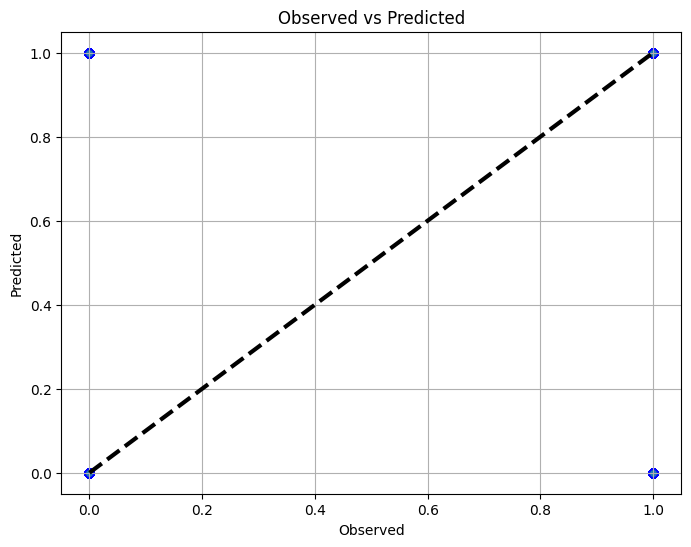

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=gb_tuned.predict(X_test)
ax.scatter(Y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("Observed vs Predicted")
plt.grid()
plt.show()

The graph plotted between the Observed and Predicted values shows a straight line indicating that the values are extremely close to one another and that the model built is reliable.

**Important Features of the Final Model**

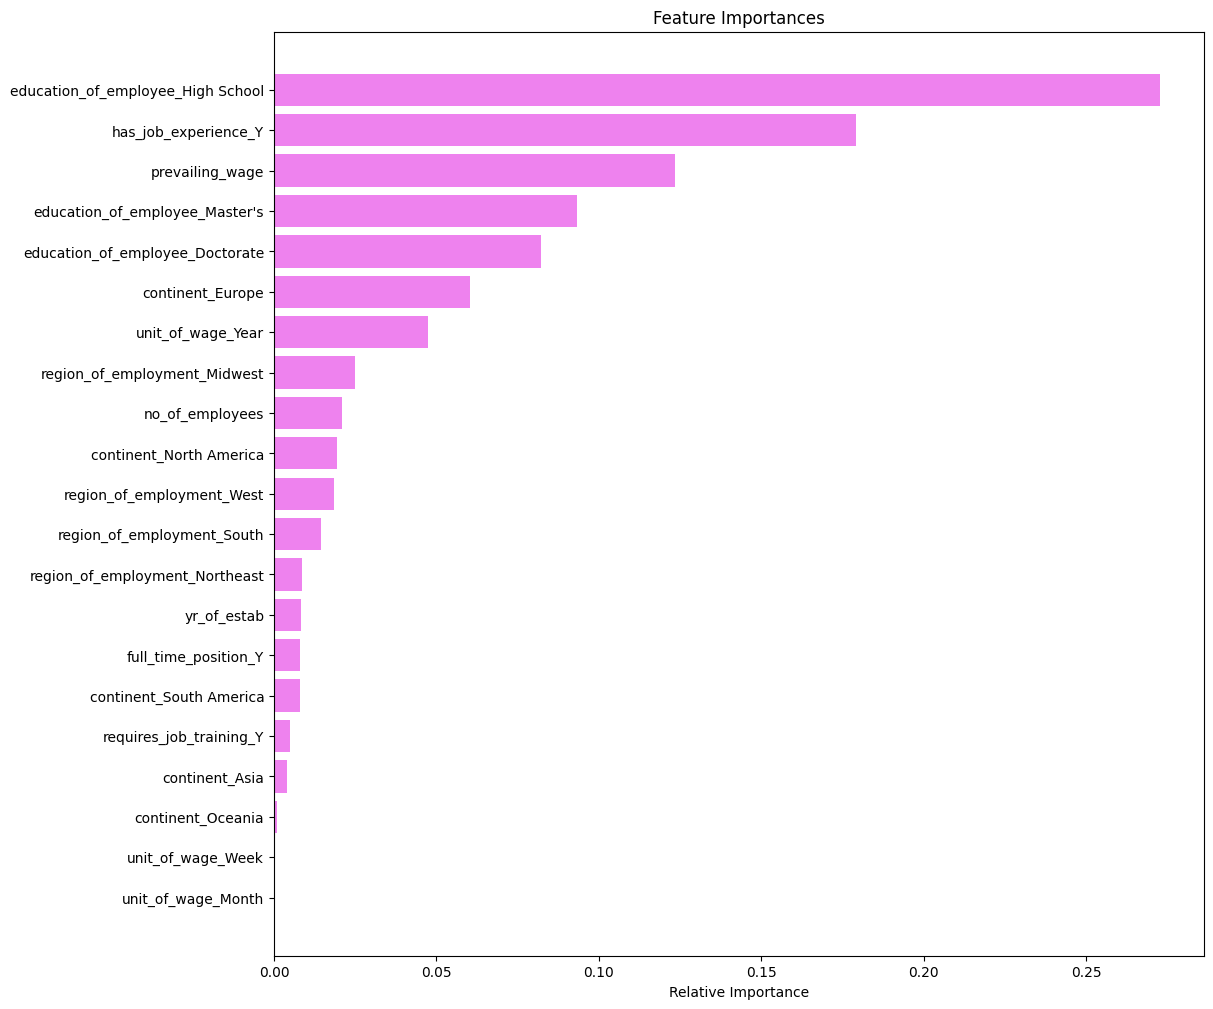

In [ ]:
feature_names = X_train.columns
importances = gb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

**Conclusions and Business Recommendations**
1. The predictive model built shows that the minimum educational qualification of the employee is based off of just high school level. The employees are required to have prior job experience before being allowed to work in the US.
2. The prevailing wages of the most employees seems to be quite high and are mostly paid by the hour.
3. Visas must be certfied to only those who can demontrate their capablities, those who are right for the job and satisfying the necessary conditions.
4. Since most workers are foreingers, their visa approvals can be facilitated depending on their employment and educational background.
5. Compotent and experienced workers must be hired based on their eduactional qualifications.
6. Workers can be brought in from a more diverse background, not just limited to Asia.
